<a href="https://colab.research.google.com/github/AdityaDesai006/Image-Classification-Using-Tensorflow/blob/main/Image_Classification_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import TensorFlow

In [ ]:
import tensorflow as tf
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.9.2


### Import MNIST

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)
x_test shape: (10000, 28, 28)


### Plot an Image Example

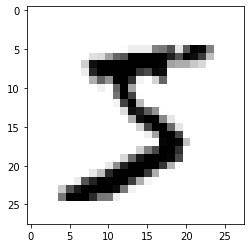

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')
plt.show()

### Display Labels

In [ ]:
y_train[0]

5

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [ ]:
print('y_train_encoded_shape:', y_train_encoded.shape)
print('y_test_encoded_shape:', y_test_encoded.shape)

y_train_encoded_shape: (60000, 10)
y_test_encoded_shape: (10000, 10)


### Display Encoded Labels

In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Task 4: Neural Networks


\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}



### Unrolling N-dimensional Arrays to Vectors

In [ ]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape:  (10000, 784)


### Display Pixel Values

In [ ]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [ ]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

### Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

### Activation Functions & Compiling Model

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}



In [ ]:
model.compile(
    optimizer ='sgd',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [ ]:
model.fit(x_train_norm, y_train_encoded, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3651 - accuracy: 0.8950
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1794 - accuracy: 0.9482
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1364 - accuracy: 0.9601


### Evaluating the Model

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1306 - accuracy: 0.9613
Test set accuracy: 96.13000154495239



### Predictions on Test Set

In [ ]:
preds = model.predict(x_test_norm)
print('Shape of preds: ', preds.shape)

313/313 [==============================] - 1s 2ms/step
Shape of preds:  (10000, 10)


### Plotting the Results

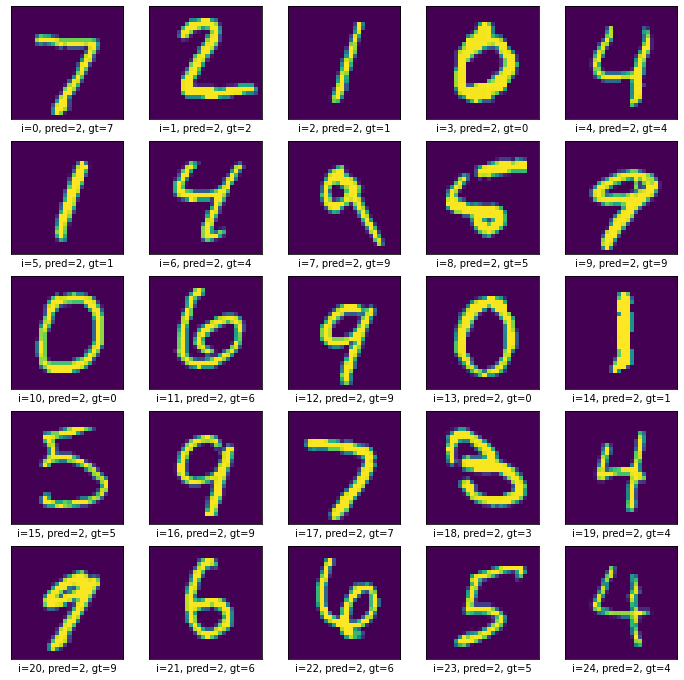

In [ ]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index + 1])
    gt = y_test[start_index + i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index + i, pred, gt))
    plt.imshow(x_test[start_index + i])

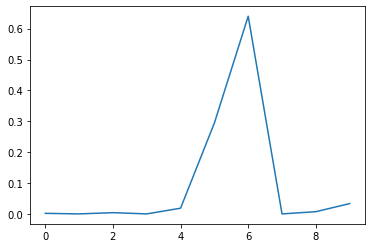

In [ ]:
plt.plot(preds[8])
plt.show()